<a href="https://www.kaggle.com/code/adebowaleoluwafemi71/house-price-prediction-aso?scriptVersionId=161302954" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


# EXPLORATORY DATA ANALYSIS

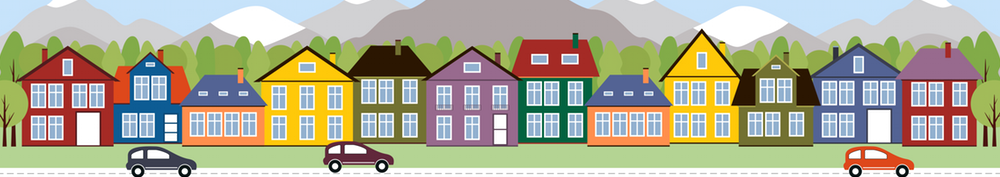

### The Best House SalePrice:


In the vibrant city of Lagos, Nigeria, a few weeks ago, a group of friends found themselves immersed in the complex world of apartment hunting. While contemplating optimal deals amidst a myriad of options, I seized the opportunity to embark on a fascinating project—investigating the transformative potential of deep neural networks in reshaping this intricate process.

Consider prompting a homebuyer to articulate their vision of an ideal residence, you'd likely hear about more than just the number of bedrooms or the presence of a quaint white-picket fence. The narrative unfolds against the backdrop of a captivating Kaggle competition, wherein the dataset revealed the nuanced interplay of factors influencing price negotiations—extending far beyond structural attributes.

Inspired by Kaggle's **'house saleprice competition'**, this undertaking yielded an average score. However, in the dynamic landscape of innovation, there persists an ongoing pursuit of refinement. I eagerly anticipate immersing myself in more compelling tasks on the horizon as the days unfold, presenting a canvas of possibilities.

The commencement of this year holds the promise of a splendid journey, brimming with opportunities for exploration, discovery, and an unwavering commitment to continuous improvement.

In [2]:
###Import the needed llibraries
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

The data for training the algorithm and submission is loaded as Pandas data frame using the code below

In [3]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
Submission_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [4]:
train_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
Submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [7]:
Submission_df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

A description of the 'SalePrice' shows an average/mean price at 180,921.195890 while the median price is 163000.
This means that the distribution of the 'SalePrice' is skewed. 

/tmp/ipykernel_1306/2878792426.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

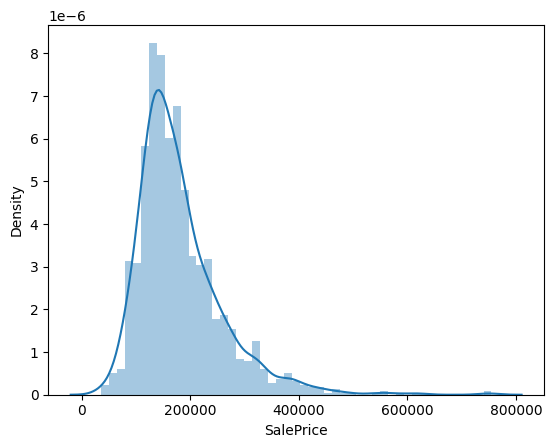

In [9]:
sns.distplot(train_df['SalePrice'])

An analysis of the **'SalePrice'** distribution in the training dataset is presented graphically. 

The distribution is right-skewed, indicating that the majority of values are smaller and concentrated towards the left tail, while a few exceptionally large values extend the right tail. These outliers have a notable impact on the ***mean***, causing it to be higher than the ***median***. The distribution of the 'SalePrice' column is not indicative of a normal distribution, it's important to note that applying a normal probability model to skewed data is not appropriate.

## NUMERICAL DATA ANALYSIS

Now, to review the numerical featues within the dataset to draw insights 

In [10]:
train_df = train_df.drop('Id', axis=1)
df_num = train_df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

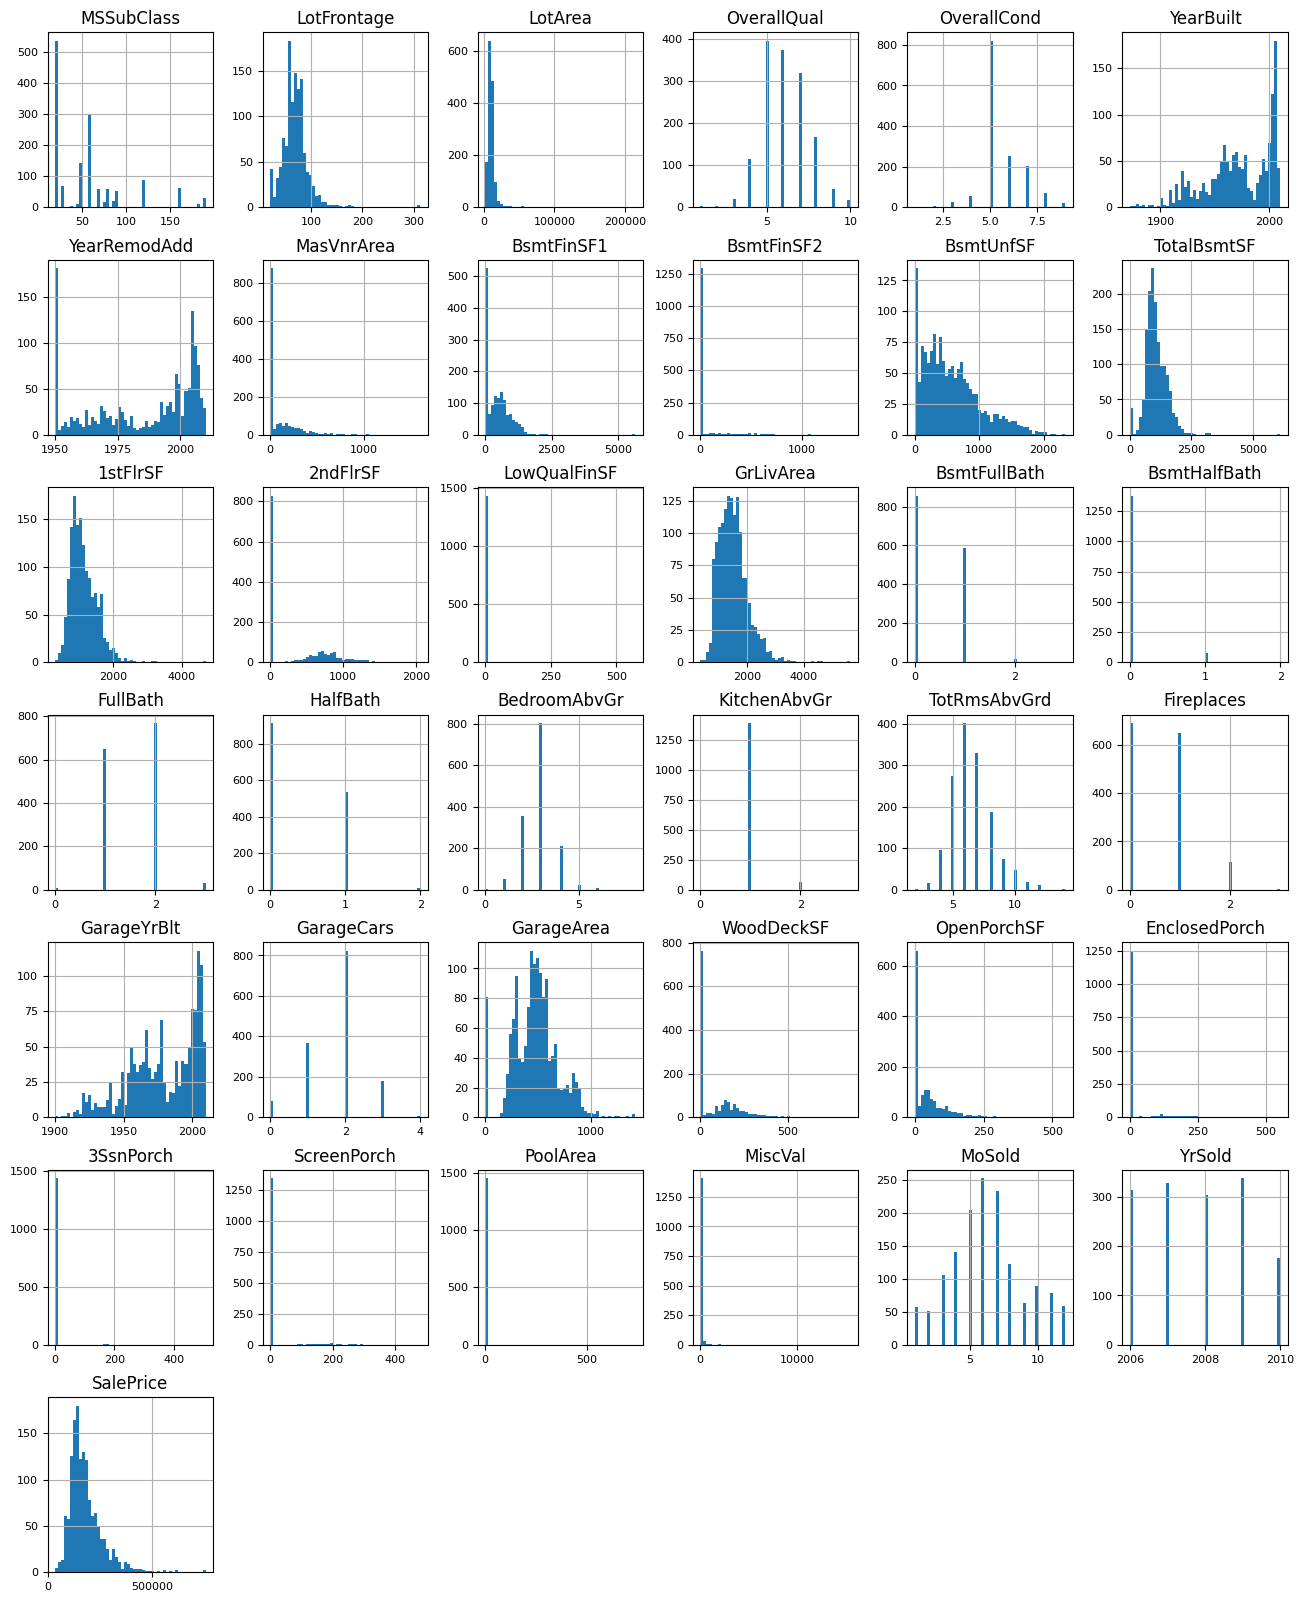

In [11]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

# CATEGORICAL DATA ANALYSIS

To review the categorical columns to see their distribution and possible insights 

In [12]:
df_cat = train_df.select_dtypes(include = ['object'])
df_cat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [13]:
catcol = []

for colname in df_cat.select_dtypes("object"):
    catcol.append(colname)

In [14]:
df_cat.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


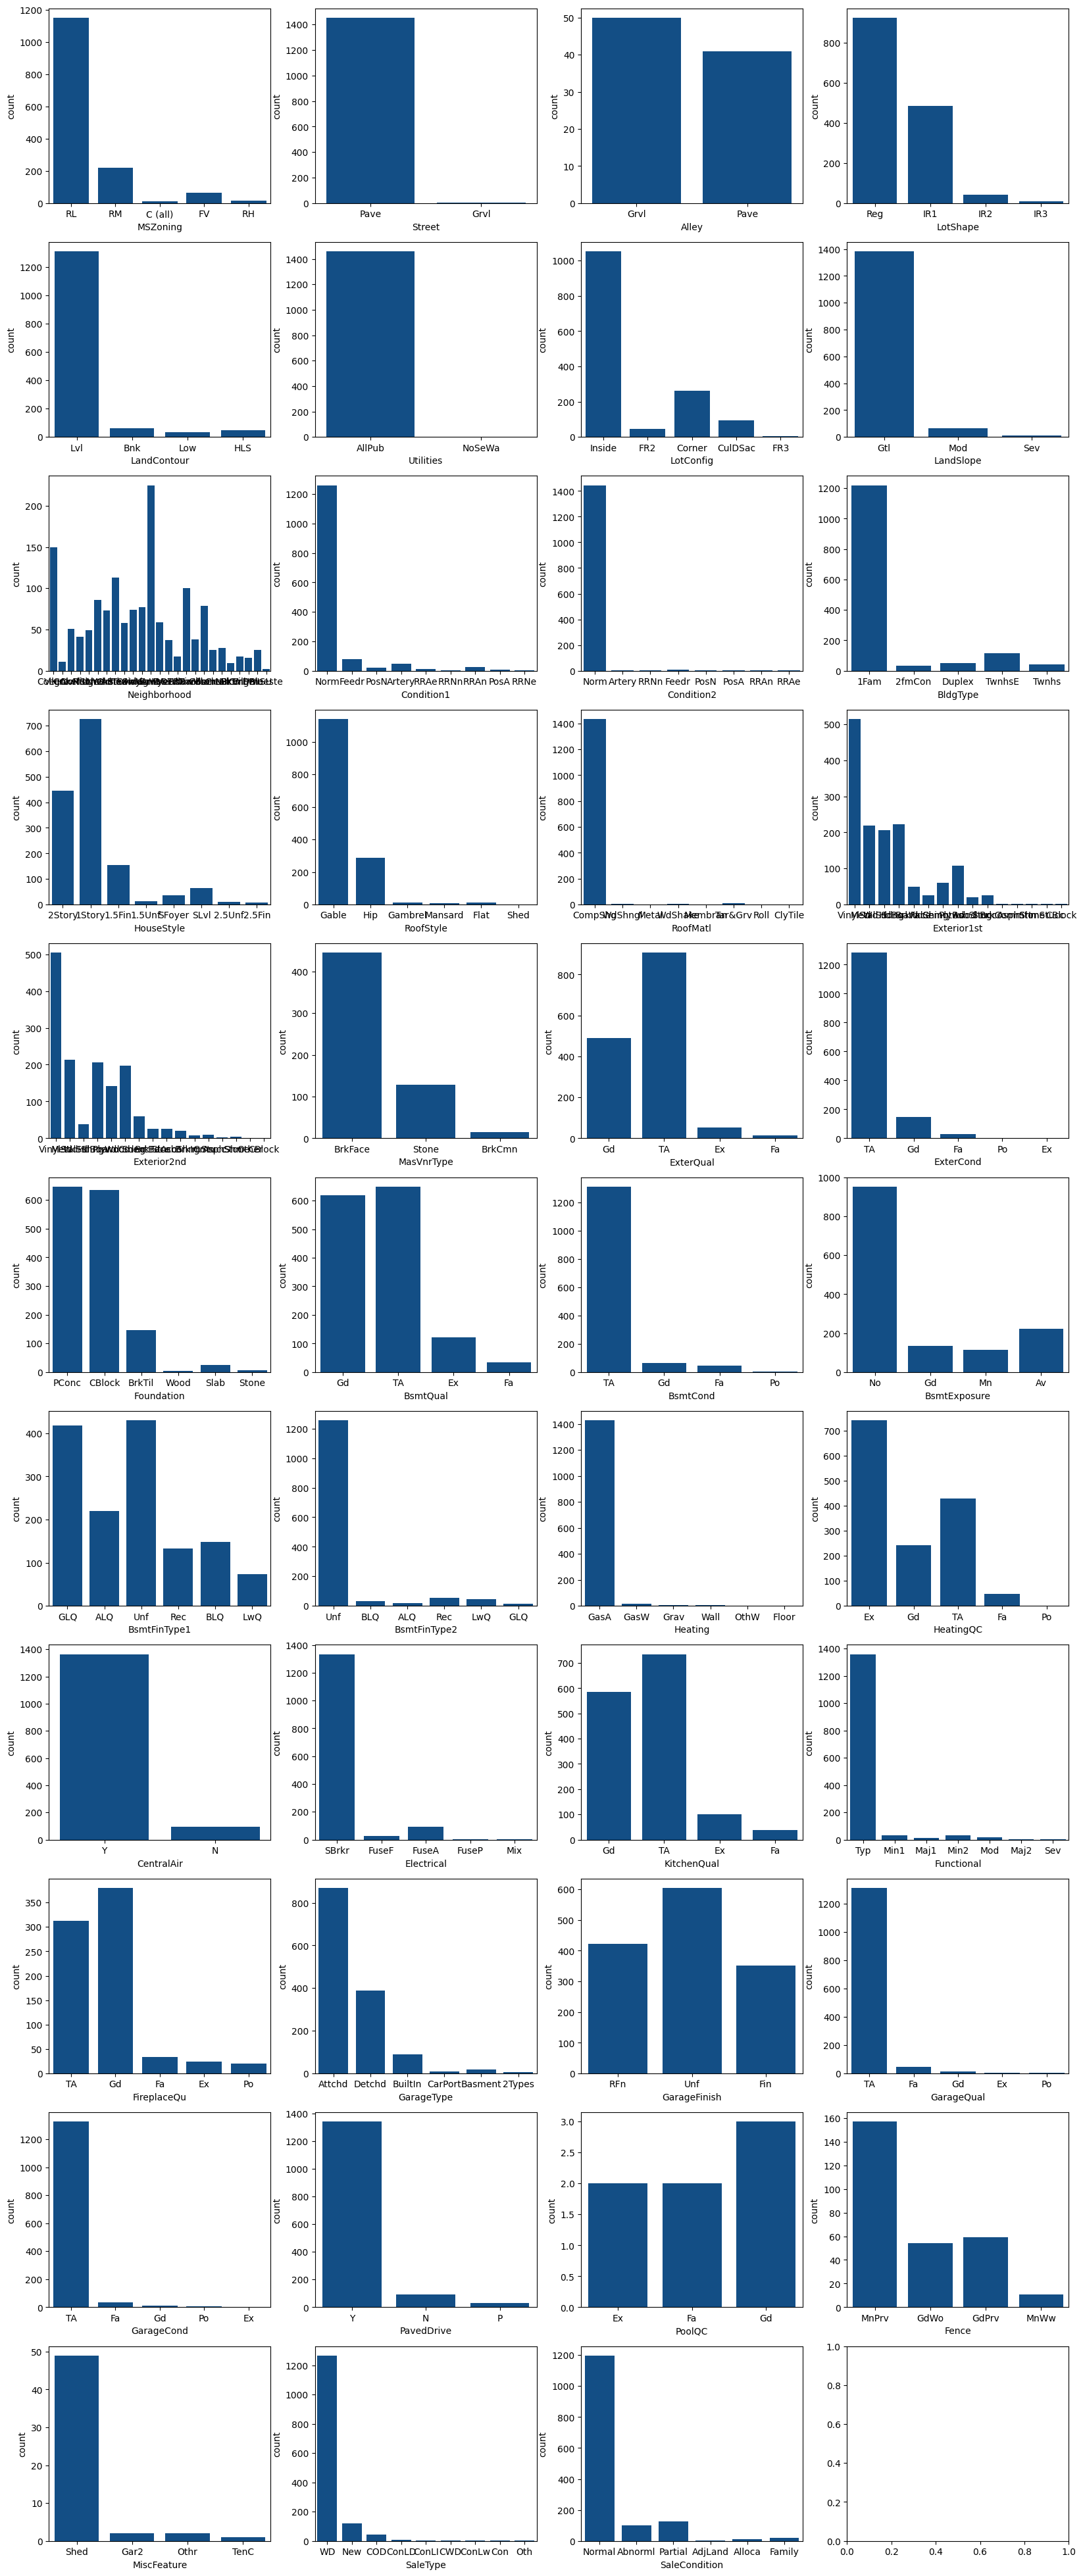

In [15]:
fig , ax = plt.subplots(11,4,figsize = (20,50))    
for i , subplots in zip (catcol, ax.flatten()):  
  sns.countplot(data =df_cat, x= i ,ax = subplots, color = "#004F98")
plt.show()

## Graphically explore the relationship within features and the target variable

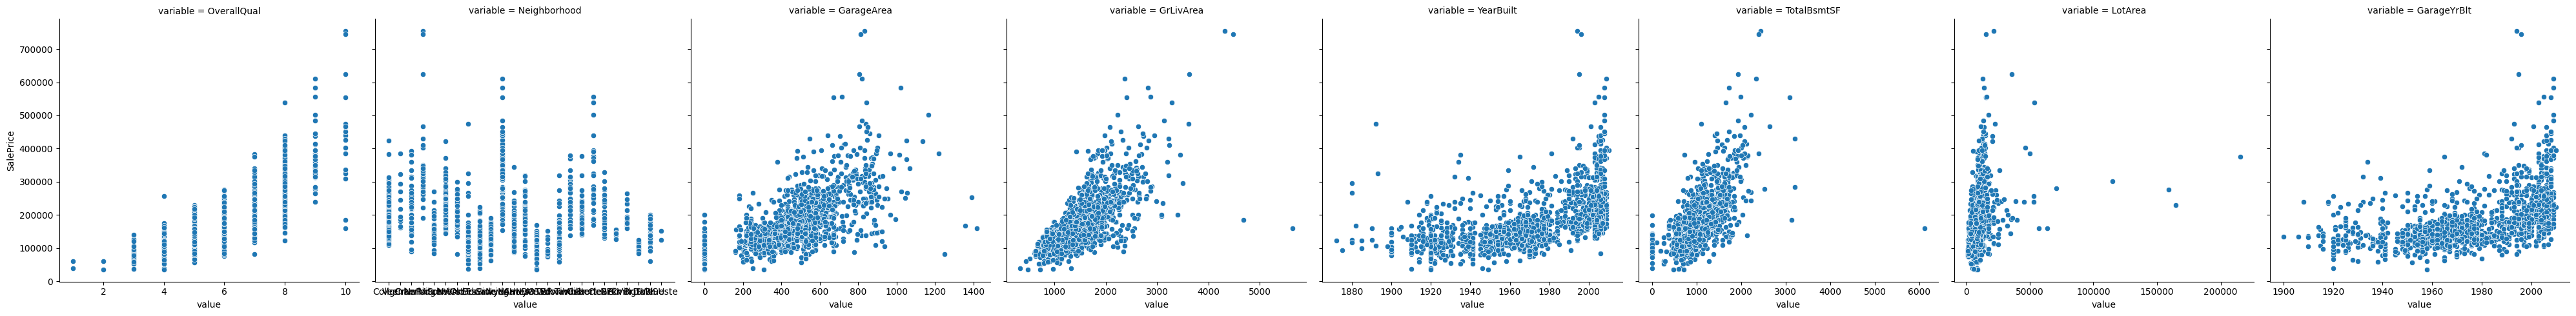

In [16]:
features = ["OverallQual","Neighborhood","GarageArea","GrLivArea","YearBuilt","TotalBsmtSF","LotArea","GarageYrBlt"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=train_df.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

Lets review if there is any relationship between the month when the buildings were sold and the type of building to review if there exist possible relationships between this key features and the saleprice of the building

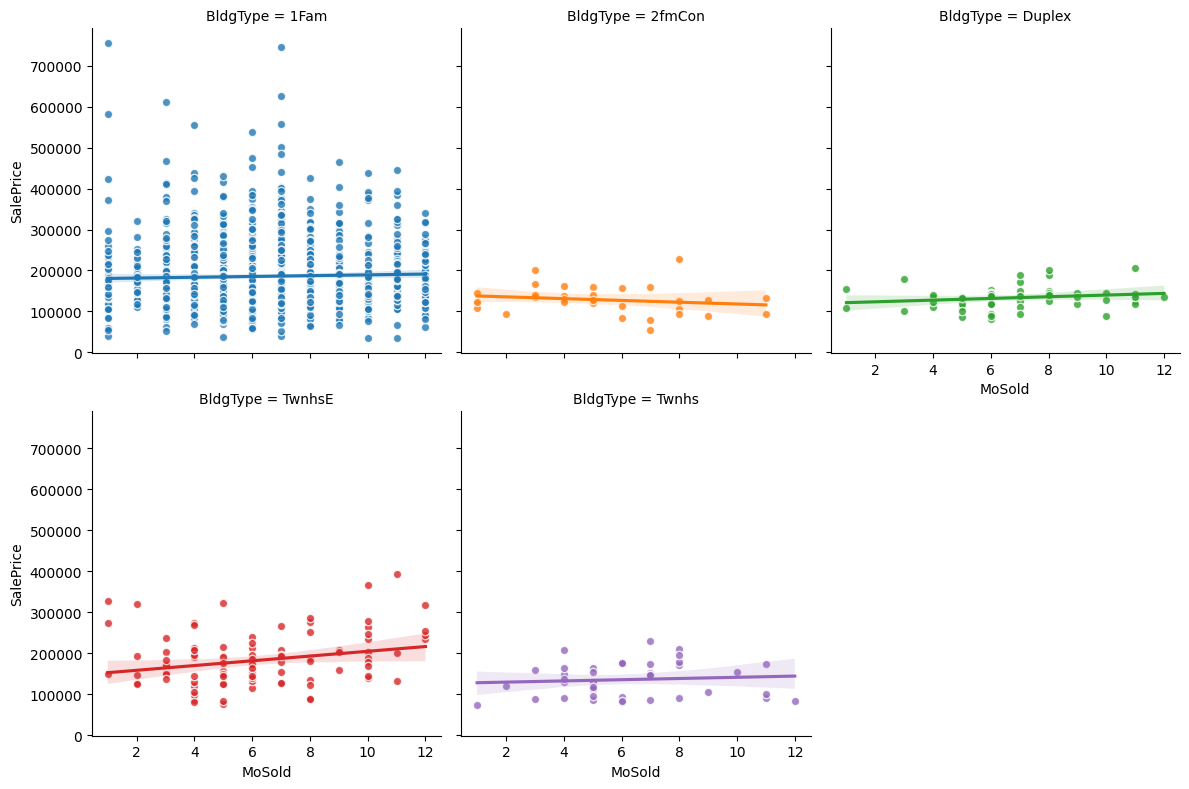

In [17]:
feature = "MoSold"
sns.lmplot(
    x=feature, y="SalePrice", hue="BldgType", col="BldgType",
    data=train_df, scatter_kws={"edgecolor": 'w'}, col_wrap=3, height=4,
);

# CORRELATION ANALYSIS 

### DATA CLEANSING AND WRANGLING PROCEDURES
For a thorough data examination:
* Begin by generating a table listing all columns alongside their respective counts of null data.
* Subsequently, eliminate columns with null values surpassing 81, along with rows missing data for the 'electrical' variable.
* To facilitate correlation analysis, convert all input into numerical format.
* Categorize features into numerical and categorical values, allowing for the encoding of categorical features.
* Encode the categorical values
* Create a correlation heat map 

In [18]:
missing = train_df.isnull().sum()
missing_cols = missing[missing > 0]
percent = (train_df.isnull().sum()/train_df.isnull().count())
missing = pd.concat([missing, percent], axis=1, keys=['Total', 'Percent'])
missing.head(-1).sort_values(ascending=False , by='Percent')

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
...,...,...
Heating,0,0.000000
MSZoning,0,0.000000
CentralAir,0,0.000000
1stFlrSF,0,0.000000


In [19]:
unencoded_df = train_df.copy()
unencoded_df = unencoded_df.drop((missing[missing['Total'] > 81]).index,axis=1) 
unencoded_df = unencoded_df.drop(unencoded_df.loc[unencoded_df['Electrical'].isnull()].index) 
unencoded_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   MSZoning       1459 non-null   object 
 2   LotArea        1459 non-null   int64  
 3   Street         1459 non-null   object 
 4   LotShape       1459 non-null   object 
 5   LandContour    1459 non-null   object 
 6   Utilities      1459 non-null   object 
 7   LotConfig      1459 non-null   object 
 8   LandSlope      1459 non-null   object 
 9   Neighborhood   1459 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Condition2     1459 non-null   object 
 12  BldgType       1459 non-null   object 
 13  HouseStyle     1459 non-null   object 
 14  OverallQual    1459 non-null   int64  
 15  OverallCond    1459 non-null   int64  
 16  YearBuilt      1459 non-null   int64  
 17  YearRemodAdd   1459 non-null   int64  
 18  RoofStyle    

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
numeric_features = unencoded_df.select_dtypes(include=['int64', 'float64'])
categorical_features = unencoded_df.select_dtypes(include=['object'])

In [21]:
numeric_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotArea        1459 non-null   int64  
 2   OverallQual    1459 non-null   int64  
 3   OverallCond    1459 non-null   int64  
 4   YearBuilt      1459 non-null   int64  
 5   YearRemodAdd   1459 non-null   int64  
 6   MasVnrArea     1451 non-null   float64
 7   BsmtFinSF1     1459 non-null   int64  
 8   BsmtFinSF2     1459 non-null   int64  
 9   BsmtUnfSF      1459 non-null   int64  
 10  TotalBsmtSF    1459 non-null   int64  
 11  1stFlrSF       1459 non-null   int64  
 12  2ndFlrSF       1459 non-null   int64  
 13  LowQualFinSF   1459 non-null   int64  
 14  GrLivArea      1459 non-null   int64  
 15  BsmtFullBath   1459 non-null   int64  
 16  BsmtHalfBath   1459 non-null   int64  
 17  FullBath       1459 non-null   int64  
 18  HalfBath     

In [22]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1459 non-null   object
 1   Street         1459 non-null   object
 2   LotShape       1459 non-null   object
 3   LandContour    1459 non-null   object
 4   Utilities      1459 non-null   object
 5   LotConfig      1459 non-null   object
 6   LandSlope      1459 non-null   object
 7   Neighborhood   1459 non-null   object
 8   Condition1     1459 non-null   object
 9   Condition2     1459 non-null   object
 10  BldgType       1459 non-null   object
 11  HouseStyle     1459 non-null   object
 12  RoofStyle      1459 non-null   object
 13  RoofMatl       1459 non-null   object
 14  Exterior1st    1459 non-null   object
 15  Exterior2nd    1459 non-null   object
 16  ExterQual      1459 non-null   object
 17  ExterCond      1459 non-null   object
 18  Foundation     1459 non-null   ob

In [23]:
for colname in categorical_features:
    categorical_features[colname]=le.fit_transform(categorical_features[colname])

categorical_features


,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,6,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,6,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,6,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,6,1,1,4,4,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,4,3,6,1,1,4,4,2,8,4
1456,3,1,3,3,0,4,0,14,2,2,...,4,3,2,1,2,4,4,2,8,4
1457,3,1,3,3,0,4,0,6,2,2,...,4,2,6,1,1,4,4,2,8,4
1458,3,1,3,3,0,4,0,12,2,2,...,0,2,6,1,2,4,4,2,8,4


In [24]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSZoning       1459 non-null   int64
 1   Street         1459 non-null   int64
 2   LotShape       1459 non-null   int64
 3   LandContour    1459 non-null   int64
 4   Utilities      1459 non-null   int64
 5   LotConfig      1459 non-null   int64
 6   LandSlope      1459 non-null   int64
 7   Neighborhood   1459 non-null   int64
 8   Condition1     1459 non-null   int64
 9   Condition2     1459 non-null   int64
 10  BldgType       1459 non-null   int64
 11  HouseStyle     1459 non-null   int64
 12  RoofStyle      1459 non-null   int64
 13  RoofMatl       1459 non-null   int64
 14  Exterior1st    1459 non-null   int64
 15  Exterior2nd    1459 non-null   int64
 16  ExterQual      1459 non-null   int64
 17  ExterCond      1459 non-null   int64
 18  Foundation     1459 non-null   int64
 19  BsmtQual   

In [25]:
encoded_df = pd.concat([numeric_features, categorical_features], axis=1)

In [26]:
encoded_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,4,2,6,1,1,4,4,2,8,4
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,4,3,6,1,1,4,4,2,8,4
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,4,2,6,1,1,4,4,2,8,4
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,4,2,6,5,2,4,4,2,8,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,4,2,6,1,1,4,4,2,8,4


In [27]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotArea        1459 non-null   int64  
 2   OverallQual    1459 non-null   int64  
 3   OverallCond    1459 non-null   int64  
 4   YearBuilt      1459 non-null   int64  
 5   YearRemodAdd   1459 non-null   int64  
 6   MasVnrArea     1451 non-null   float64
 7   BsmtFinSF1     1459 non-null   int64  
 8   BsmtFinSF2     1459 non-null   int64  
 9   BsmtUnfSF      1459 non-null   int64  
 10  TotalBsmtSF    1459 non-null   int64  
 11  1stFlrSF       1459 non-null   int64  
 12  2ndFlrSF       1459 non-null   int64  
 13  LowQualFinSF   1459 non-null   int64  
 14  GrLivArea      1459 non-null   int64  
 15  BsmtFullBath   1459 non-null   int64  
 16  BsmtHalfBath   1459 non-null   int64  
 17  FullBath       1459 non-null   int64  
 18  HalfBath     

(73, 2)


,index,SalePrice
0,SalePrice,1.000000
1,OverallQual,0.791069
2,GrLivArea,0.708618
3,GarageCars,0.640473
4,ExterQual,0.636909
...,...,...
68,Utilities,0.014317
69,BsmtFinSF2,0.011412
70,BsmtFinType2,0.008073
71,Condition2,0.007509


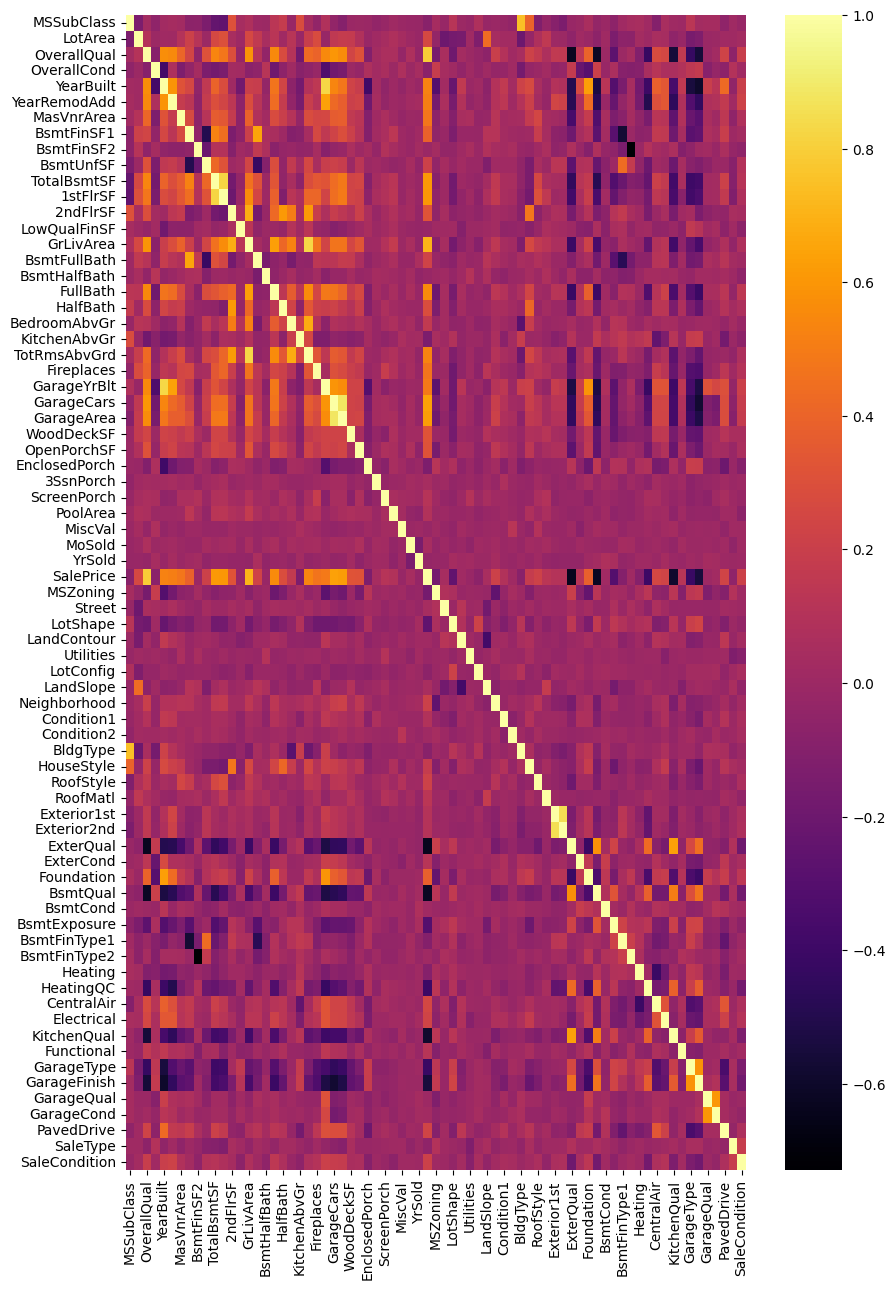

In [28]:
corr_matrix = encoded_df.corr(numeric_only = True)
plt.figure(figsize=(10,15))
sns.heatmap(corr_matrix , cmap='inferno')

correlations = corr_matrix['SalePrice'].apply(abs).sort_values(ascending=False).reset_index()
print(correlations.shape)
correlations

In [29]:
# Select the features with the highest correlation value
print(f"data with weak correlation = {encoded_df.shape}")
data = encoded_df.drop(correlations.iloc[58: , 0].values,axis=1)
print(f"data without weak correlation = {data.shape}")

data with weak correlation = (1459, 73)
data without weak correlation = (1459, 58)


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotArea        1459 non-null   int64  
 2   OverallQual    1459 non-null   int64  
 3   OverallCond    1459 non-null   int64  
 4   YearBuilt      1459 non-null   int64  
 5   YearRemodAdd   1459 non-null   int64  
 6   MasVnrArea     1451 non-null   float64
 7   BsmtFinSF1     1459 non-null   int64  
 8   BsmtUnfSF      1459 non-null   int64  
 9   TotalBsmtSF    1459 non-null   int64  
 10  1stFlrSF       1459 non-null   int64  
 11  2ndFlrSF       1459 non-null   int64  
 12  GrLivArea      1459 non-null   int64  
 13  BsmtFullBath   1459 non-null   int64  
 14  FullBath       1459 non-null   int64  
 15  HalfBath       1459 non-null   int64  
 16  BedroomAbvGr   1459 non-null   int64  
 17  KitchenAbvGr   1459 non-null   int64  
 18  TotRmsAbvGrd 

# BUILDING THE NEURAL NETWORK

In [31]:
#Select the key features/columns that with highest correlation
Feat = data.columns
print(Feat)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'SalePrice',
       'MSZoning', 'LotShape', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [32]:
#lets select the key features from the dataframe
train_data = train_df[Feat]
train_data = train_data.drop(train_data.loc[train_data['Electrical'].isnull()].index) 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1459 entries, 0 to 1459
Data columns (total 58 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1459 non-null   int64  
 1   LotArea        1459 non-null   int64  
 2   OverallQual    1459 non-null   int64  
 3   OverallCond    1459 non-null   int64  
 4   YearBuilt      1459 non-null   int64  
 5   YearRemodAdd   1459 non-null   int64  
 6   MasVnrArea     1451 non-null   float64
 7   BsmtFinSF1     1459 non-null   int64  
 8   BsmtUnfSF      1459 non-null   int64  
 9   TotalBsmtSF    1459 non-null   int64  
 10  1stFlrSF       1459 non-null   int64  
 11  2ndFlrSF       1459 non-null   int64  
 12  GrLivArea      1459 non-null   int64  
 13  BsmtFullBath   1459 non-null   int64  
 14  FullBath       1459 non-null   int64  
 15  HalfBath       1459 non-null   int64  
 16  BedroomAbvGr   1459 non-null   int64  
 17  KitchenAbvGr   1459 non-null   int64  
 18  TotRmsAbvGrd 

In [33]:
#Let's select the same columns from the test dataframe 
Sub_df = Submission_df[['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'MSZoning', 'LotShape',
       'Neighborhood', 'HouseStyle', 'RoofStyle', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtExposure', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'GarageType', 'GarageFinish', 'PavedDrive',
       'SaleCondition']]

In [34]:
Sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1459 non-null   int64  
 1   OverallQual    1459 non-null   int64  
 2   YearBuilt      1459 non-null   int64  
 3   YearRemodAdd   1459 non-null   int64  
 4   MasVnrArea     1444 non-null   float64
 5   BsmtFinSF1     1458 non-null   float64
 6   BsmtUnfSF      1458 non-null   float64
 7   TotalBsmtSF    1458 non-null   float64
 8   1stFlrSF       1459 non-null   int64  
 9   2ndFlrSF       1459 non-null   int64  
 10  GrLivArea      1459 non-null   int64  
 11  BsmtFullBath   1457 non-null   float64
 12  FullBath       1459 non-null   int64  
 13  HalfBath       1459 non-null   int64  
 14  BedroomAbvGr   1459 non-null   int64  
 15  TotRmsAbvGrd   1459 non-null   int64  
 16  Fireplaces     1459 non-null   int64  
 17  GarageYrBlt    1381 non-null   float64
 18  GarageCa

In [35]:
#Import the necessary libraries
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer,make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [36]:
testXC = Sub_df.copy()
X = train_data.copy()
y = X.pop("SalePrice")
y = np.log(y)

concatenated_df = pd.concat([testXC, X], ignore_index=True)

# Identify numerical and categorical columns
numeric_features = concatenated_df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = concatenated_df.select_dtypes(include=['object']).columns

# Create separate DataFrames for numerical and categorical data
numeric_df = concatenated_df[numeric_features]
categorical_df = concatenated_df[categorical_features]

# Fill missing values in numerical columns with mean
numeric_df_filled = numeric_df.apply(lambda col: col.fillna(col.mean()), axis=0)

# Fill missing values in categorical columns with mode
categorical_df_filled = categorical_df.apply(lambda col: col.fillna(col.mode()[0] if len(col.mode()) > 0 else np.nan), axis=0)

# Concatenate the filled DataFrames back together
concatenated_df_filled = pd.concat([numeric_df_filled, categorical_df_filled], axis=1)

# Separate numeric and categorical features
numeric_features_filled = concatenated_df_filled.select_dtypes(include=['int64', 'float64']).columns
categorical_features_filled = concatenated_df_filled.select_dtypes(include=['object']).columns

# Preprocessing using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features_filled),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_features_filled)
    ])

concatenated_array = preprocessor.fit_transform(concatenated_df_filled)
X_test = concatenated_array[:len(testXC)]
X = concatenated_array[len(testXC):]



/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.3, random_state=42)



print("{} examples in training, {} examples in testing.".format(
    len(X_train), len(X_valid)))

print("{} examples of y in training,{} examples of X in training,{} examples of y in validation set, {} examples of X in Validation set.".format(
    len(y_train),len(X_train), len(y_valid),len(X_valid)))

1021 examples in training, 438 examples in testing.
1021 examples of y in training,1021 examples of X in training,438 examples of y in validation set, 438 examples of X in Validation set.


In [38]:
input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [222]


In [39]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(1024, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),    
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dense(1),
])


model.compile(
    optimizer='Adam',
    loss='mae',
)

Minimum validation loss: 0.10600308328866959


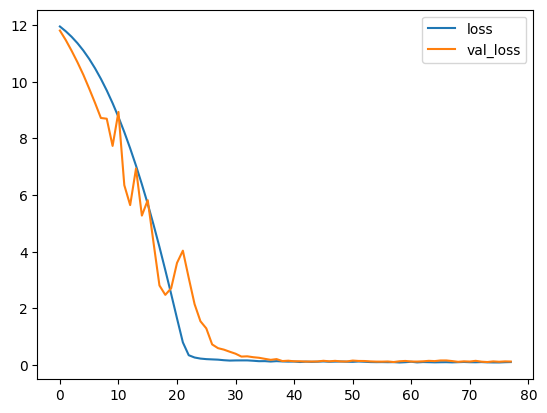

In [40]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

A lower validation loss would have been appreciated but after some tuning of the hidden nural layers, this appears to be one of the best set of layers.
Attempting to use a more effective hyperparameter tuning could improve further result in predicting previously unseen data.

In [41]:
predictions = model.predict(X_test)
print(predictions)

46/46 [==============================] - 0s 4ms/step
[[11.539119]
 [11.954447]
 [12.050905]
 ...
 [11.639847]
 [11.720568]
 [12.274349]]


In [42]:
ids = Submission_df['Id']
predictions = np.exp(predictions)

output2 = pd.DataFrame({'Id': ids,
                           'SalePrice': predictions.squeeze()})

output2.head()

,Id,SalePrice
0,1461,102653.929688
1,1462,155507.109375
2,1463,171254.359375
3,1464,179858.890625
4,1465,193441.859375


In [43]:
# import the modules we'll need
from IPython.display import HTML
import base64

# function that takes in a dataframe and creates a text link to  
# download it (will only work for files < 2MB or so)
def create_download_link(df, title = "House Price", filename = "Submission.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)

# create a random sample dataframe
df = pd.DataFrame({'Id': ids,'SalePrice': predictions.squeeze()})

# create a link to download the dataframe
create_download_link(df)

# ↓ ↓ ↓  Yay, download link! ↓ ↓ ↓ 